# Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset

In [2]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Langkah 1: Tampilkan informasi dasar tentang dataset
# Dokumentasi: Mengecek struktur, tipe data, dan menampilkan beberapa baris pertama dataset.

In [3]:
print("Day Dataset Info:")
print(day_data.info())
print(day_data.head())

print("\nHour Dataset Info:")
print(hour_data.info())
print(hour_data.head())

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday

# Langkah 2: Cek nilai yang hilang
# Dokumentasi: Memastikan tidak ada nilai yang hilang.

In [4]:
print("\nMissing Values in Day Dataset:")
print(day_data.isnull().sum())

print("\nMissing Values in Hour Dataset:")
print(hour_data.isnull().sum())


Missing Values in Day Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in Hour Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# Langkah 3. Statistik Deskriptif

In [5]:
print("\nDescriptive Statistics for Day Dataset:")
print(day_data.describe())

print("\nDescriptive Statistics for Hour Dataset:")
print(hour_data.describe())


Descriptive Statistics for Day Dataset:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894  

# Langkah 4: Persiapan analisis clustering
# Dokumentasi: Menggunakan clustering untuk mengidentifikasi pola perilaku dalam dataset.

In [6]:
clustering_features = ['temp', 'hum', 'windspeed', 'casual', 'registered']
clustering_data = day_data[clustering_features]

# Standarize Data

In [7]:
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Langkah 5: Tentukan jumlah cluster optimal menggunakan metode elbow
# Dokumentasi: Metode elbow membantu menentukan jumlah cluster dengan mengamati di mana inersia menurun lebih lambat.

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot metode elbow

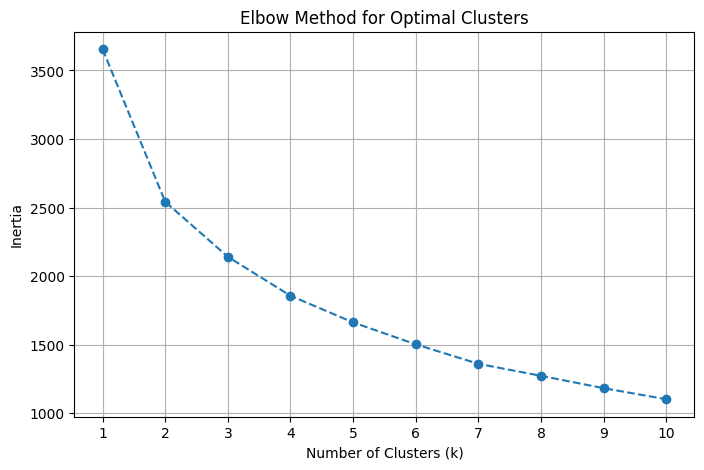

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# Langkah 6: Analisis RFM (Recency, Frequency, Monetary)
# Dokumentasi: Menganalisis perilaku pengguna berdasarkan penggunaan terbaru, frekuensi, dan total penyewaan.


In [10]:
day_data['recency'] = pd.to_datetime(day_data['dteday']).apply(lambda x: (pd.to_datetime('2012-12-31') - x).days)
day_data['frequency'] = day_data['registered'] + day_data['casual']
day_data['monetary'] = day_data['cnt']

# Skor RFM

In [11]:
rfm = day_data[['recency', 'frequency', 'monetary']]
rfm['R_Score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

<ipython-input-11-4fce82f30daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R_Score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])
<ipython-input-11-4fce82f30daf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F_Score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])
<ipython-input-11-4fce82f30daf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# Gabung skor RFM

In [12]:
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
print("\nHasil Analisis RFM:")
print(rfm.head())


Hasil Analisis RFM:
   recency  frequency  monetary R_Score F_Score M_Score  RFM_Score
0      730        985       985       1       1       1          3
1      729        801       801       1       1       1          3
2      728       1349      1349       1       1       1          3
3      727       1562      1562       1       1       1          3
4      726       1600      1600       1       1       1          3


<ipython-input-12-87c869c163c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)


# Langkah 7: Visualisasi
# Dokumentasi: Plot distribusi untuk skor R, F, dan M.

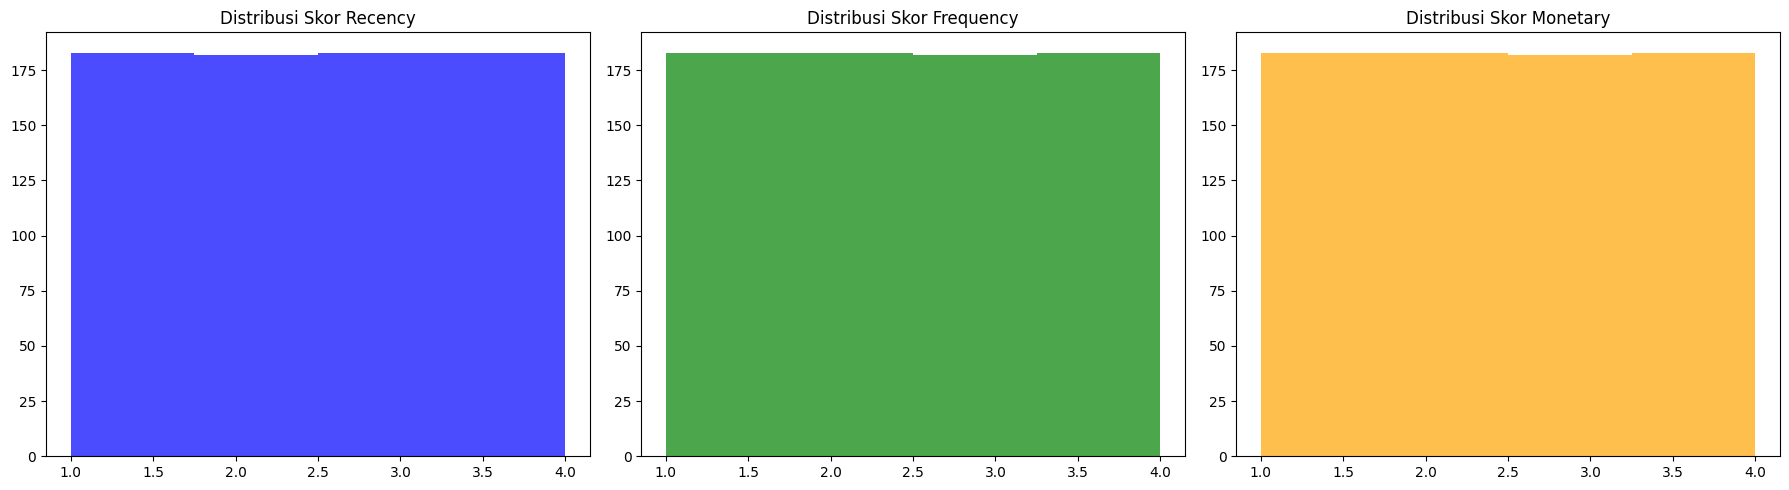

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].hist(rfm['R_Score'], bins=4, color='blue', alpha=0.7)
axs[0].set_title('Distribusi Skor Recency')

axs[1].hist(rfm['F_Score'], bins=4, color='green', alpha=0.7)
axs[1].set_title('Distribusi Skor Frequency')

axs[2].hist(rfm['M_Score'], bins=4, color='orange', alpha=0.7)
axs[2].set_title('Distribusi Skor Monetary')

plt.tight_layout()
plt.show()